In [53]:
from flask import Flask, request, jsonify
import os
import random
import requests
import matplotlib.pyplot as plt
import numpy as np
import joblib
import json
from PIL import Image
from datetime import datetime


In [2]:
# Load model and label mapping
model = joblib.load('models/best_random_forest_model_more_data_2023-11-16_1527.pkl')
with open('models/random_forest_labels_to_idx_more_data.json', 'r') as f:
    label_to_idx = json.load(f)
    idx_to_label = {v: k for k, v in label_to_idx.items()}

In [3]:
folder_path = 'auto_sorted_data/'  # Replace with your image folder path
subfolders = [sf for sf in os.listdir(folder_path) if sf != '.DS_Store']
# [os.listdir(f) for f in [f'{folder_path}{subfolder}' for subfolder in subfolders]][0]
filepaths = []
for subfolder in subfolders: 
    files = os.listdir((f'{folder_path}{subfolder}'))
    for f in files:
        filepaths.append(f'{folder_path}{subfolder}/{f}')
# filepaths

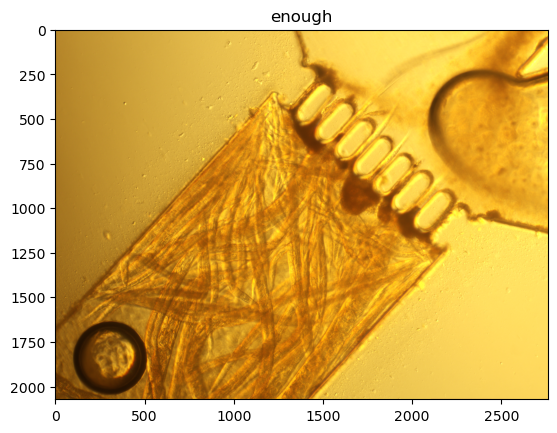

In [31]:
# image_files = [f for f in os.listdir(f'{folder_path}/{subfolder}') if f.endswith('.tif')]  # Adjust file type if necessary
# selected_image = random.choice(image_files)
# image_path = os.path.join(folder_path, selected_image)
image_path = random.choice(filepaths)
plot_title =  os.path.basename(os.path.dirname(image_path))

# Display the image
img = Image.open(image_path)
img.save('temp_images/temp.tif')
plt.imshow(img)
plt.title(plot_title)
plt.show()


In [58]:
url = 'http://127.0.0.1:5000/predict'  # URL where the Flask app is running
response = requests.get(url)
response.status_code

200

In [59]:
response.json()['prediction']

'not_enough'

In [35]:
response.raw

2023-11-23_151804 Prediction: enough


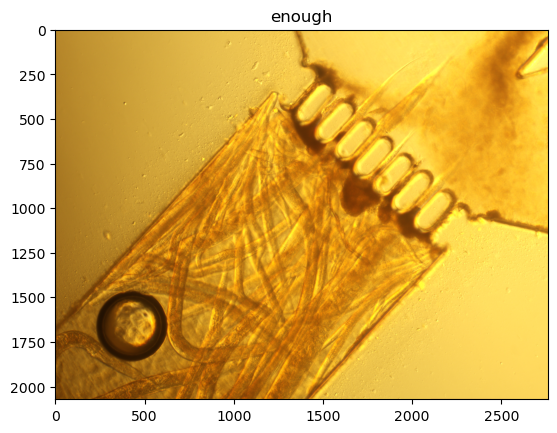

2023-11-23_151805 Prediction: bubble


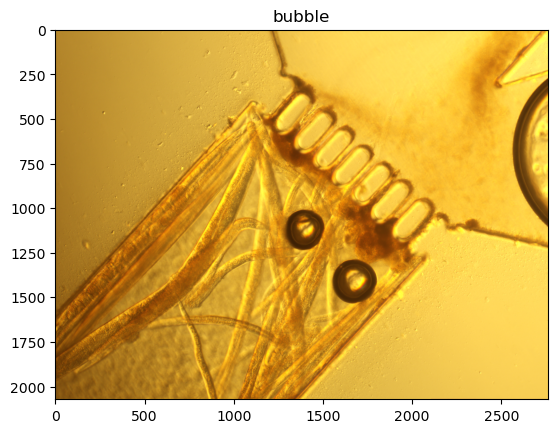

2023-11-23_151806 Prediction: enough


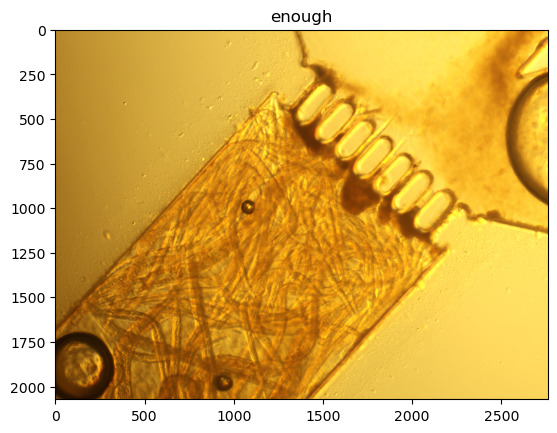

2023-11-23_151807 Prediction: not_enough


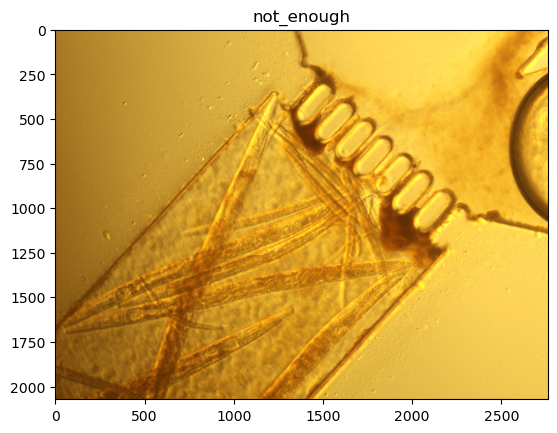

2023-11-23_151808 Prediction: bubble


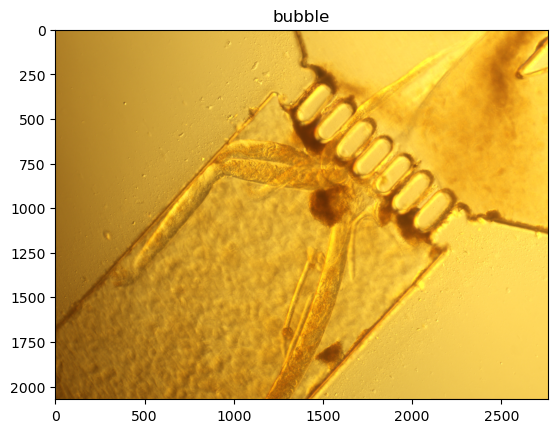

2023-11-23_151809 Prediction: bubble


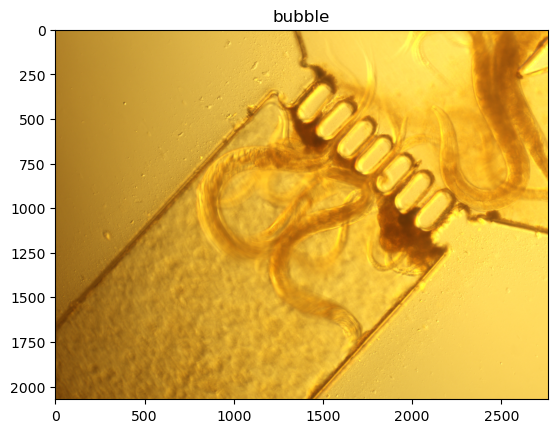

2023-11-23_151810 Prediction: not_enough


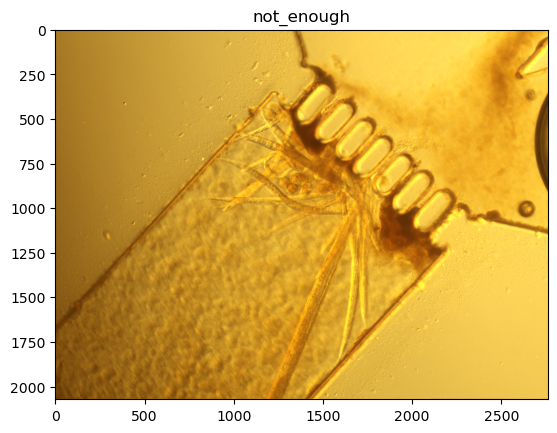

2023-11-23_151810 Prediction: bubble


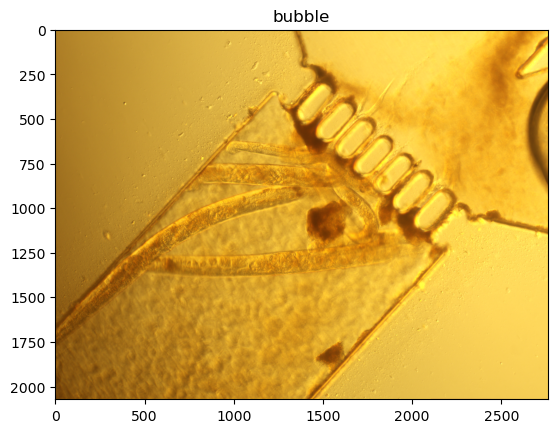

2023-11-23_151811 Prediction: enough


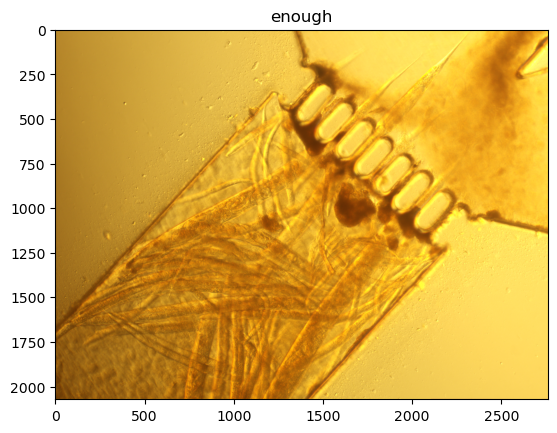

2023-11-23_151812 Prediction: not_enough


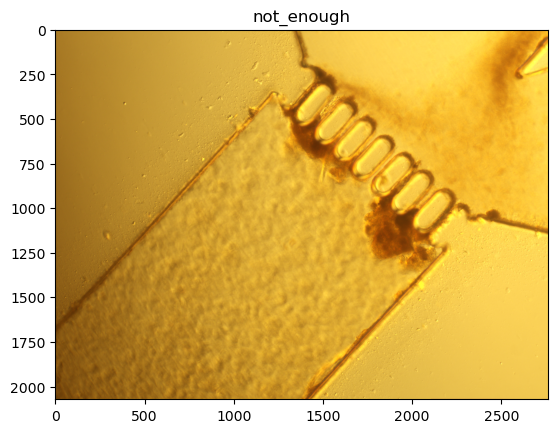

In [55]:
for i in range(10):
    image_path = random.choice(filepaths)
    plot_title =  os.path.basename(os.path.dirname(image_path))
    
    # Display the image
    img = Image.open(image_path)
    img.save('temp_images/temp.tif')
    
    response = requests.get(url)
    prediction = response.json()['prediction']
    now = datetime.utcnow().strftime('%Y-%m-%d_%H%M%S')
    print(f"{now} Prediction: {prediction}")
    
    plt.imshow(img)
    plt.title(plot_title)
    plt.show()

In [65]:
for i in range(10):
    image_path = random.choice(filepaths)
    plot_title =  os.path.basename(os.path.dirname(image_path))
    
    # Display the image
    img = Image.open(image_path)
    img.save('temp_images/temp.tif')
    
    response = requests.get(url)
    prediction = response.json()['prediction']
    now = datetime.utcnow().strftime('%Y-%m-%d_%H:%M:%S.%f')[:22]
    # print(f"{now} Prediction: {prediction}")
    print(f"{now} : {prediction}")
    
    # plt.imsh
    # w()

2023-11-23_16:09:03.72 : bubble
2023-11-23_16:09:04.21 : not_enough
2023-11-23_16:09:04.70 : bubble
2023-11-23_16:09:05.20 : bubble
2023-11-23_16:09:05.70 : bubble
2023-11-23_16:09:06.20 : enough
2023-11-23_16:09:06.72 : bubble
2023-11-23_16:09:07.21 : bubble
2023-11-23_16:09:07.71 : enough
2023-11-23_16:09:08.21 : bubble
